# Academy Awards Ratings Analysis Project

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Academy Award Dataset

In [2]:
#import dataset 
#kaggle URL https://www.kaggle.com/datasets/unanimad/the-oscar-award?resource=download
full_oscars = pd.read_csv(r"C:\Users\chlot\OneDrive\Desktop\the_oscars.csv")

In [3]:
full_oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 497.5+ KB


In [4]:
full_oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [5]:
#filtering out the columns ceremony because the year of the ceremony is what counts for this analysis. 
oscars = full_oscars[["year_film", "year_ceremony", "category", "name", "film", "winner"]]

In [6]:
oscars.head()

,year_film,year_ceremony,category,name,film,winner
0,1927,1928,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,ACTRESS,Gloria Swanson,Sadie Thompson,False


### Analysis

In [7]:
winners = oscars[oscars["winner"] == True]

In [8]:
winners

,year_film,year_ceremony,category,name,film,winner
1,1927,1928,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,CINEMATOGRAPHY,Karl Struss,Sunrise,True
...,...,...,...,...,...,...
10390,2019,2020,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,HONORARY AWARD,Wes Studi,NaN,True


In [9]:
nominated = oscars[oscars["winner"] == False]

In [10]:
#what are the most nominted movies
oscars[["film"]].value_counts()

film                       
A Star Is Born                 25
Titanic                        16
Moulin Rouge                   15
Mutiny on the Bounty           15
Little Women                   14
                               ..
Let's Make Love                 1
Let's Pollute                   1
Lethal Weapon                   1
Lethal Weapon 2                 1
Éramos Pocos (One Too Many)     1
Length: 4833, dtype: int64

In [12]:
#The results show that A Star is Born was nominated far more than any other movie and seems like an outlier.
#There might be more than one film with that name in the list.

#### Outlier Analysis 

In [13]:
star_born = oscars[oscars["film"] == "A Star Is Born"]
star_born

,year_film,year_ceremony,category,name,film,winner
523,1937,1938,ACTOR,Fredric March,A Star Is Born,False
534,1937,1938,ACTRESS,Janet Gaynor,A Star Is Born,False
558,1937,1938,ASSISTANT DIRECTOR,Eric Stacey,A Star Is Born,False
573,1937,1938,DIRECTING,William Wellman,A Star Is Born,False
607,1937,1938,OUTSTANDING PRODUCTION,Selznick International Pictures,A Star Is Born,False
634,1937,1938,WRITING (Original Story),"William A. Wellman, Robert Carson",A Star Is Born,True
639,1937,1938,WRITING (Screenplay),"Dorothy Parker, Alan Campbell, Robert Carson",A Star Is Born,False
2888,1954,1955,ACTOR,James Mason,A Star Is Born,False
2896,1954,1955,ACTRESS,Judy Garland,A Star Is Born,False
2913,1954,1955,ART DIRECTION (Color),"Art Direction: Malcolm Bert, Gene Allen, Iren...",A Star Is Born,False


In [14]:
#There are 4 different A Star Is Born Movies: 1938, 1955, 1977 and 2019

In [15]:
#adding the release year to the table helps differentiate the films from different years with the same title
count = oscars[["film", "year_film"]].value_counts() 

In [16]:
#another way to find the list of individual movies would be using .drop_duplicates
unique_movies = oscars.drop_duplicates(subset=["film", "year_film"])
unique_movies

,year_film,year_ceremony,category,name,film,winner
0,1927,1928,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...
10371,2019,2020,SOUND MIXING,"Gary Rydstrom, Tom Johnson and Mark Ulano",Ad Astra,False
10376,2019,2020,VISUAL EFFECTS,"Dan DeLeeuw, Russell Earl, Matt Aitken and Dan...",Avengers: Endgame,False
10378,2019,2020,VISUAL EFFECTS,"Robert Legato, Adam Valdez, Andrew R. Jones an...",The Lion King,False
10386,2019,2020,WRITING (Original Screenplay),Written by Rian Johnson,Knives Out,False


In [17]:
#Certain awards are givin out without a movie related to it, let's drop those rows
unique_movies.dropna()

,year_film,year_ceremony,category,name,film,winner
0,1927,1928,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...
10365,2019,2020,SHORT FILM (Live Action),Delphine Girard,A Sister,False
10371,2019,2020,SOUND MIXING,"Gary Rydstrom, Tom Johnson and Mark Ulano",Ad Astra,False
10376,2019,2020,VISUAL EFFECTS,"Dan DeLeeuw, Russell Earl, Matt Aitken and Dan...",Avengers: Endgame,False
10378,2019,2020,VISUAL EFFECTS,"Robert Legato, Adam Valdez, Andrew R. Jones an...",The Lion King,False


In [18]:
#this confirms that 4934 movies were nominated across all academy award ceremonies

#### Analysis of the highest winning movies

In [19]:
biggest_winners = winners[["film", "year_film"]].value_counts()
biggest_winners

film                                           year_film
Titanic                                        1997         11
Ben-Hur                                        1959         11
The Lord of the Rings: The Return of the King  2003         11
West Side Story                                1961         10
The Last Emperor                               1987          9
                                                            ..
Knighty Knight Bugs                            1958          1
Kokoda Front Line!                             1942          1
Kolya                                          1996          1
Kon-Tiki                                       1951          1
tom thumb                                      1958          1
Length: 1286, dtype: int64

In [20]:
df_winners = pd.DataFrame(biggest_winners)

In [22]:
#slicing the top 10
df_winners[:10]

,,0
film,year_film,
Titanic,1997,11
Ben-Hur,1959,11
The Lord of the Rings: The Return of the King,2003,11
West Side Story,1961,10
The Last Emperor,1987,9
Gigi,1958,9
The English Patient,1996,9
Slumdog Millionaire,2008,8
Cabaret,1972,8


### Joining the top 10 with the original dataset

In [23]:
top10 = df_winners[:10].merge(oscars, on=["year_film", "film"], how="inner")
top10

,year_film,film,0,year_ceremony,category,name,winner
0,1997,Titanic,11,1998,ACTRESS IN A LEADING ROLE,Kate Winslet,False
1,1997,Titanic,11,1998,ACTRESS IN A SUPPORTING ROLE,Gloria Stuart,False
2,1997,Titanic,11,1998,ART DIRECTION,Art Direction: Peter Lamont; Set Decoration:...,True
3,1997,Titanic,11,1998,CINEMATOGRAPHY,Russell Carpenter,True
4,1997,Titanic,11,1998,COSTUME DESIGN,Deborah L. Scott,True
...,...,...,...,...,...,...,...
105,1954,On the Waterfront,8,1955,DIRECTING,Elia Kazan,True
106,1954,On the Waterfront,8,1955,FILM EDITING,Gene Milford,True
107,1954,On the Waterfront,8,1955,MUSIC (Music Score of a Dramatic or Comedy Pic...,Leonard Bernstein,False
108,1954,On the Waterfront,8,1955,BEST MOTION PICTURE,"Sam Spiegel, Producer",True


In [24]:
top10[top10["category"] == "BEST PICTURE"]

,year_film,film,0,year_ceremony,category,name,winner
10,1997,Titanic,11,1998,BEST PICTURE,"James Cameron and Jon Landau, Producers",True
33,2003,The Lord of the Rings: The Return of the King,11,2004,BEST PICTURE,"Barrie M. Osborne, Peter Jackson and Fran Wals...",True
54,1987,The Last Emperor,9,1988,BEST PICTURE,"Jeremy Thomas, Producer",True
75,1996,The English Patient,9,1997,BEST PICTURE,"Saul Zaentz, Producer",True
84,2008,Slumdog Millionaire,8,2009,BEST PICTURE,"Christian Colson, Producer",True
95,1972,Cabaret,8,1973,BEST PICTURE,"Cy Feuer, Producer",False


In [25]:
top10[top10["category"] == "BEST PICTURE"]

,year_film,film,0,year_ceremony,category,name,winner
10,1997,Titanic,11,1998,BEST PICTURE,"James Cameron and Jon Landau, Producers",True
33,2003,The Lord of the Rings: The Return of the King,11,2004,BEST PICTURE,"Barrie M. Osborne, Peter Jackson and Fran Wals...",True
54,1987,The Last Emperor,9,1988,BEST PICTURE,"Jeremy Thomas, Producer",True
75,1996,The English Patient,9,1997,BEST PICTURE,"Saul Zaentz, Producer",True
84,2008,Slumdog Millionaire,8,2009,BEST PICTURE,"Christian Colson, Producer",True
95,1972,Cabaret,8,1973,BEST PICTURE,"Cy Feuer, Producer",False


## IMDB Dataset

In [26]:
#importing IMDB dataset to look at ratings for oscar movies
full_imdb = pd.read_csv(r"C:\Users\chlot\OneDrive\Desktop\imdb_top_1000.csv")

In [27]:
full_imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [28]:
#removing unneeded columns, as I am mostly interesteed in the ratings
imdb = full_imdb[["Series_Title", "Released_Year", "Runtime", "Genre", "IMDB_Rating", "Meta_score", "Director", "Gross"]]

In [29]:
imdb.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,"4,360,000"


In [30]:
#gain some information about the dataset, that includes the top 1000 movies on IMDB
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   Gross          831 non-null    object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


### Joining Academy Award and IMDB datasets

In [31]:
merged = oscars.merge(imdb, left_on=["film"], right_on=["Series_Title"])
merged

,year_film,year_ceremony,category,name,film,winner,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
0,1929,1930,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,False,All Quiet on the Western Front,1930,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
1,1929,1930,DIRECTING,Lewis Milestone,All Quiet on the Western Front,True,All Quiet on the Western Front,1930,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
2,1929,1930,OUTSTANDING PRODUCTION,Universal,All Quiet on the Western Front,True,All Quiet on the Western Front,1930,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
3,1929,1930,WRITING,"(George Abbott), (Maxwell Anderson), (Del Andr...",All Quiet on the Western Front,False,All Quiet on the Western Front,1930,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
4,1932,1933,DIRECTING,George Cukor,Little Women,False,Little Women,2019,135 min,"Drama, Romance",7.8,91.0,Greta Gerwig,"108,101,214"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,2019,2020,BEST PICTURE,"Peter Chernin, Jenno Topping and James Mangold...",Ford v Ferrari,False,Ford v Ferrari,2019,152 min,"Action, Biography, Drama",8.1,81.0,James Mangold,"117,624,028"
2258,2019,2020,SOUND EDITING,Donald Sylvester,Ford v Ferrari,True,Ford v Ferrari,2019,152 min,"Action, Biography, Drama",8.1,81.0,James Mangold,"117,624,028"
2259,2019,2020,SOUND MIXING,"Paul Massey, David Giammarco and Steven A. Morrow",Ford v Ferrari,False,Ford v Ferrari,2019,152 min,"Action, Biography, Drama",8.1,81.0,James Mangold,"117,624,028"
2260,2019,2020,VISUAL EFFECTS,"Dan DeLeeuw, Russell Earl, Matt Aitken and Dan...",Avengers: Endgame,False,Avengers: Endgame,2019,181 min,"Action, Adventure, Drama",8.4,78.0,Anthony Russo,"858,373,000"


In [32]:
merged.drop(["Released_Year", "Series_Title"], axis=1)

,year_film,year_ceremony,category,name,film,winner,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
0,1929,1930,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,False,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
1,1929,1930,DIRECTING,Lewis Milestone,All Quiet on the Western Front,True,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
2,1929,1930,OUTSTANDING PRODUCTION,Universal,All Quiet on the Western Front,True,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
3,1929,1930,WRITING,"(George Abbott), (Maxwell Anderson), (Del Andr...",All Quiet on the Western Front,False,152 min,"Drama, War",8.0,91.0,Lewis Milestone,"3,270,000"
4,1932,1933,DIRECTING,George Cukor,Little Women,False,135 min,"Drama, Romance",7.8,91.0,Greta Gerwig,"108,101,214"
...,...,...,...,...,...,...,...,...,...,...,...,...
2257,2019,2020,BEST PICTURE,"Peter Chernin, Jenno Topping and James Mangold...",Ford v Ferrari,False,152 min,"Action, Biography, Drama",8.1,81.0,James Mangold,"117,624,028"
2258,2019,2020,SOUND EDITING,Donald Sylvester,Ford v Ferrari,True,152 min,"Action, Biography, Drama",8.1,81.0,James Mangold,"117,624,028"
2259,2019,2020,SOUND MIXING,"Paul Massey, David Giammarco and Steven A. Morrow",Ford v Ferrari,False,152 min,"Action, Biography, Drama",8.1,81.0,James Mangold,"117,624,028"
2260,2019,2020,VISUAL EFFECTS,"Dan DeLeeuw, Russell Earl, Matt Aitken and Dan...",Avengers: Endgame,False,181 min,"Action, Adventure, Drama",8.4,78.0,Anthony Russo,"858,373,000"


### Analysis of merged table

In [33]:
#lowerst and higest rated movie 
merged["Meta_score"].min()

28.0

In [34]:
merged[merged["Meta_score"] == 28]

,year_film,year_ceremony,category,name,film,winner,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
1477,2001,2002,ACTOR IN A LEADING ROLE,Sean Penn,I Am Sam,False,I Am Sam,2001,132 min,Drama,7.7,28.0,Jessie Nelson,"40,311,852"


In [35]:
merged["Meta_score"].max()

100.0

In [36]:
merged["IMDB_Rating"].max()

9.3

### Visualizations

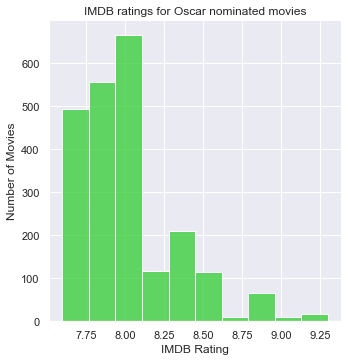

In [37]:
sns.set(color_codes=True)
sns.displot(merged["IMDB_Rating"], bins=10, color= "limegreen")
sns.set_style("darkgrid")
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.title ("IMDB ratings for Oscar nominated movies")
plt.show()

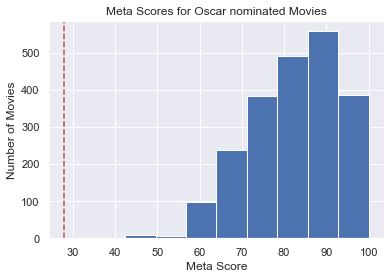

In [38]:
fig, ax= plt.subplots()
ax.hist(merged["Meta_score"])
ax.set_xlabel("Meta Score")
ax.set_ylabel("Number of Movies")
ax.set_title("Meta Scores for Oscar nominated Movies")
ax.axvline(x=28, label="Worst Meta Score for Oscar nominated Movie", linestyle= "--", color="r")
plt.show()

In [39]:
#ratings for the top10
top10_rating = df_winners[:10].merge(imdb, how="inner", left_on=["film"], right_on=["Series_Title"])

In [40]:
top10_rating
#The imdb ratings and Meta-Scores of the movies with the most awards

,0,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
0,11,Titanic,1997,194 min,"Drama, Romance",7.8,75.0,James Cameron,"659,325,379"
1,11,Ben-Hur,1959,212 min,"Adventure, Drama, History",8.1,90.0,William Wyler,"74,700,000"
2,11,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,"377,845,905"
3,9,The Last Emperor,1987,163 min,"Biography, Drama, History",7.7,76.0,Bernardo Bertolucci,"43,984,230"
4,8,Slumdog Millionaire,2008,120 min,"Drama, Romance",8.0,84.0,Danny Boyle,"141,319,928"
5,8,Cabaret,1972,124 min,"Drama, Music, Musical",7.8,80.0,Bob Fosse,"42,765,000"
6,8,On the Waterfront,1954,108 min,"Crime, Drama, Thriller",8.1,91.0,Elia Kazan,"9,600,000"
